In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt

import gym
import gym_gigticket

# Implementation of a Q learner

A basic q learner implementation to solve the gig ticket pricing problem.

Gym environment v0 is really simple. 

There are 200 available tickets, 20 different opportunities to change the price and 9 different price options between 10 and 100.

Action are +£10, 0 or -£10. 


References: 
Q learner basics https://github.com/simoninithomas/Deep_reinforcement_learning_Course/blob/master/Q%20learning/FrozenLake/Q%20Learning%20with%20FrozenLake.ipynb by Thomas Simioni

In [2]:
env = gym.make('gigticket-v0')

In [40]:
# How many possible states are there.
state_size = 9*200*20
state_size

36000

In [44]:
# Initialise a Q table with all zeros. 
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [25]:
# Set up the training parameters.

total_episodes = 3000000      # Total episodes
learning_rate = 0.8           # Learning rate
max_steps = 20                # Max steps per episode
gamma = 0.95                  # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.00005             # Exponential decay rate for exploration prob

In [26]:
# Implement training that will use the bellman equation to update the locations in the q table.

# List of rewards
rewards = []

# 2 For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        #print(state)
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0, 1)
        
        state_current_q_table = int((state[0]/10)*state[1]*state[2])
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state_current_q_table,:])

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()

        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        new_state_q_table =  int((new_state[0]/10)*new_state[1]*new_state[2])
        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state

        qtable[state_current_q_table, action] = qtable[state_current_q_table, action] + learning_rate * (reward + gamma * np.max(qtable[new_state_q_table, :]) - qtable[state_current_q_table, action])
        
        
        # Our new state is state
        state = new_state
        
        # If done (if we're dead) : finish episode
        if done == True: 
            #print('epidode ends')
            break
        
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    rewards.append(reward)
    #print(rewards)

print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(qtable)

Score over time: 5240.381156666666
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Text(0, 0.5, 'Episode Reward')

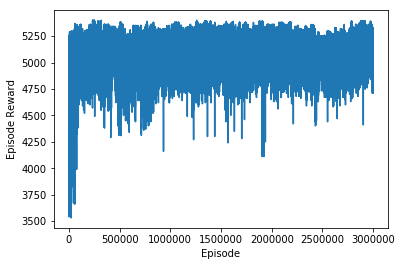

In [45]:
# Plot how the reward of episodes changes over the episodes. 
plt.plot(range(total_episodes), rewards)
plt.xlabel('Episode')
plt.ylabel('Episode Reward')

In [46]:
# Testing how good it ends up being. 

In [38]:
env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):
        print(state)
        # Take the action (index) that have the maximum expected future reward given that state
        state_current_q_table = int((state[0]/10)*state[1]*state[2])
        action = np.argmax(qtable[state_current_q_table,:])
        new_state, reward, done, info = env.step(action)
        
        if done:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            env.render()
            print(reward)
            
            # We print the number of step it took.
            print("Number of steps", step)
            break
        state = new_state
env.close()

****************************************************
EPISODE  0
[50, 200, 20]
[60, 195, 19]
[50, 189, 18]
[60, 184, 17]
[60, 179, 16]
[70, 175, 15]
[60, 170, 14]
[70, 166, 13]
[70, 162, 12]
[70, 158, 11]
[70, 154, 10]
[80, 151, 9]
[80, 148, 8]
[80, 145, 7]
[80, 142, 6]
[80, 139, 5]
[80, 136, 4]
[80, 133, 3]
[80, 130, 2]
[70, 127, 1]
5270
Number of steps 19
****************************************************
EPISODE  1
[50, 200, 20]
[60, 195, 19]
[50, 189, 18]
[60, 184, 17]
[60, 179, 16]
[70, 175, 15]
[60, 170, 14]
[70, 166, 13]
[70, 162, 12]
[70, 158, 11]
[70, 154, 10]
[80, 151, 9]
[80, 148, 8]
[80, 145, 7]
[80, 142, 6]
[80, 139, 5]
[80, 136, 4]
[80, 133, 3]
[80, 130, 2]
[70, 127, 1]
5270
Number of steps 19
****************************************************
EPISODE  2
[50, 200, 20]
[60, 195, 19]
[50, 189, 18]
[60, 184, 17]
[60, 179, 16]
[70, 175, 15]
[60, 170, 14]
[70, 166, 13]
[70, 162, 12]
[70, 158, 11]
[70, 154, 10]
[80, 151, 9]
[80, 148, 8]
[80, 145, 7]
[80, 142, 6]
[80, 139, 5]

# Assessment:

Q learner manages to do a good job on this basic set up. 

Q learners fall down when the state space becomes really large and therefore the q table really large. 

Iniitially I want to keep the problem simple and implement a number of methods (deep q learner, policy gradient, actor critic etc)
and get these working on the really simple case before thinking about making it more complicated. 